In [1]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

print(x_train_full.shape, x_train_full.dtype)
print(x_test.shape, x_test.dtype)

VAL_SIZE = 4000

x_valid, x_train = x_train_full[:VAL_SIZE] / 255.0, x_train_full[VAL_SIZE:] / 255.0
y_valid, y_train = y_train_full[:VAL_SIZE], y_train_full[VAL_SIZE:]

# Перетворення 2D зображень у 1D вектори
x_train = x_train.reshape(-1, 28 * 28)
x_valid = x_valid.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Перетворення міток класів у one-hot encoding
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_valid_one_hot = keras.utils.to_categorical(y_valid, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

2024-09-24 12:02:57.984224: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-24 12:02:57.984710: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-24 12:02:57.987748: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-24 12:02:57.997275: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 12:02:58.015525: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

(60000, 28, 28) uint8
(10000, 28, 28) uint8


In [2]:
class_names = [
    'T-shirt',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

class_names[y_train[0]], class_names[y_valid[0]]

('Bag', 'Ankle boot')

In [3]:
import tensorflow as tf

def create_model_relu():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(28*28,)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [4]:
def create_model_tanh():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(512, activation='tanh', input_shape=(28*28,)),
        tf.keras.layers.Dense(256, activation='tanh'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [5]:
def create_model_relu_new():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(256, activation='relu', input_shape=(28*28,)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

def train_and_plot(model, model_name, x_train, y_train, x_valid, y_valid):
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid), batch_size=32, verbose=2)
    
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

    val_loss, val_acc = model.evaluate(x_valid, y_valid, verbose=0)
    print(f"Точність на валідаційних даних для {model_name}: {val_acc:.4f}")

/home/suphomie/uni/homeworks-labs/deep-learning-tools/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1750/1750 - 14s - 8ms/step - accuracy: 0.8297 - loss: 0.4720 - val_accuracy: 0.8597 - val_loss: 0.3992
Epoch 2/10
1750/1750 - 12s - 7ms/step - accuracy: 0.8677 - loss: 0.3583 - val_accuracy: 0.8758 - val_loss: 0.3411
Epoch 3/10
1750/1750 - 12s - 7ms/step - accuracy: 0.8811 - loss: 0.3206 - val_accuracy: 0.8765 - val_loss: 0.3452
Epoch 4/10
1750/1750 - 11s - 7ms/step - accuracy: 0.8890 - loss: 0.2980 - val_accuracy: 0.8820 - val_loss: 0.3335
Epoch 5/10
1750/1750 - 11s - 7ms/step - accuracy: 0.8947 - loss: 0.2787 - val_accuracy: 0.8838 - val_loss: 0.3189
Epoch 6/10
1750/1750 - 12s - 7ms/step - accuracy: 0.9002 - loss: 0.2662 - val_accuracy: 0.8648 - val_loss: 0.3643
Epoch 7/10
1750/1750 - 11s - 6ms/step - accuracy: 0.9053 - loss: 0.2522 - val_accuracy: 0.8863 - val_loss: 0.3137
Epoch 8/10
1750/1750 - 11s - 6ms/step - accuracy: 0.9091 - loss: 0.2409 - val_accuracy: 0.8813 - val_loss: 0.3443
Epoch 9/10
1750/1750 - 11s - 6ms/step - accuracy: 0.9115 - loss: 0.2291 - val_accuracy: 

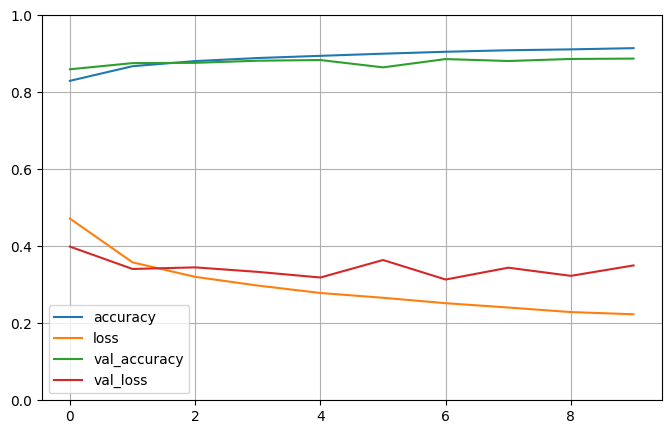

Точність на валідаційних даних для Модель 1: 0.8875


In [7]:
model_1 = create_model_relu()
train_and_plot(model_1, "Модель 1", x_train, y_train_one_hot, x_valid, y_valid_one_hot)

/home/suphomie/uni/homeworks-labs/deep-learning-tools/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1750/1750 - 15s - 8ms/step - accuracy: 0.8258 - loss: 0.4748 - val_accuracy: 0.8615 - val_loss: 0.3789
Epoch 2/10
1750/1750 - 12s - 7ms/step - accuracy: 0.8616 - loss: 0.3771 - val_accuracy: 0.8415 - val_loss: 0.4281
Epoch 3/10
1750/1750 - 11s - 7ms/step - accuracy: 0.8722 - loss: 0.3460 - val_accuracy: 0.8742 - val_loss: 0.3457
Epoch 4/10
1750/1750 - 12s - 7ms/step - accuracy: 0.8788 - loss: 0.3243 - val_accuracy: 0.8660 - val_loss: 0.3644
Epoch 5/10
1750/1750 - 16s - 9ms/step - accuracy: 0.8822 - loss: 0.3147 - val_accuracy: 0.8637 - val_loss: 0.3642
Epoch 6/10
1750/1750 - 13s - 7ms/step - accuracy: 0.8863 - loss: 0.3022 - val_accuracy: 0.8860 - val_loss: 0.3120
Epoch 7/10
1750/1750 - 21s - 12ms/step - accuracy: 0.8898 - loss: 0.2956 - val_accuracy: 0.8773 - val_loss: 0.3490
Epoch 8/10
1750/1750 - 14s - 8ms/step - accuracy: 0.8902 - loss: 0.2932 - val_accuracy: 0.8875 - val_loss: 0.3263
Epoch 9/10
1750/1750 - 13s - 7ms/step - accuracy: 0.8927 - loss: 0.2852 - val_accuracy:

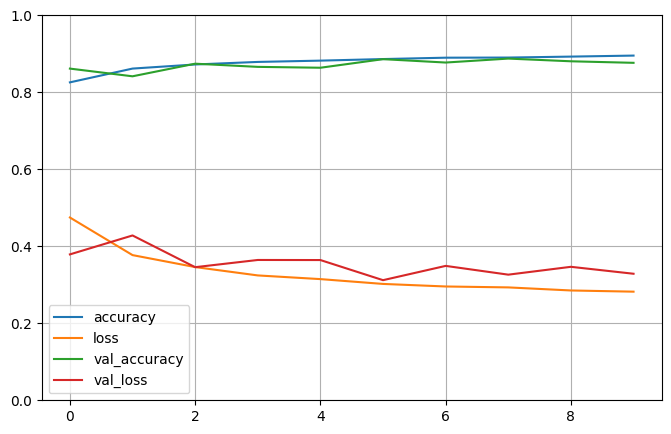

Точність на валідаційних даних для Модель 2: 0.8765


In [8]:
model_2 = create_model_tanh()
train_and_plot(model_2, "Модель 2", x_train, y_train_one_hot, x_valid, y_valid_one_hot)

/home/suphomie/uni/homeworks-labs/deep-learning-tools/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1750/1750 - 13s - 7ms/step - accuracy: 0.8229 - loss: 0.4865 - val_accuracy: 0.8665 - val_loss: 0.3753
Epoch 2/10
1750/1750 - 9s - 5ms/step - accuracy: 0.8652 - loss: 0.3674 - val_accuracy: 0.8805 - val_loss: 0.3378
Epoch 3/10
1750/1750 - 9s - 5ms/step - accuracy: 0.8779 - loss: 0.3322 - val_accuracy: 0.8708 - val_loss: 0.3489
Epoch 4/10
1750/1750 - 8s - 5ms/step - accuracy: 0.8847 - loss: 0.3094 - val_accuracy: 0.8758 - val_loss: 0.3308
Epoch 5/10
1750/1750 - 11s - 6ms/step - accuracy: 0.8919 - loss: 0.2883 - val_accuracy: 0.8825 - val_loss: 0.3175
Epoch 6/10
1750/1750 - 10s - 6ms/step - accuracy: 0.8978 - loss: 0.2770 - val_accuracy: 0.8823 - val_loss: 0.3219
Epoch 7/10
1750/1750 - 10s - 6ms/step - accuracy: 0.9012 - loss: 0.2609 - val_accuracy: 0.8900 - val_loss: 0.2997
Epoch 8/10
1750/1750 - 8s - 5ms/step - accuracy: 0.9051 - loss: 0.2517 - val_accuracy: 0.8790 - val_loss: 0.3534
Epoch 9/10
1750/1750 - 9s - 5ms/step - accuracy: 0.9088 - loss: 0.2409 - val_accuracy: 0.889

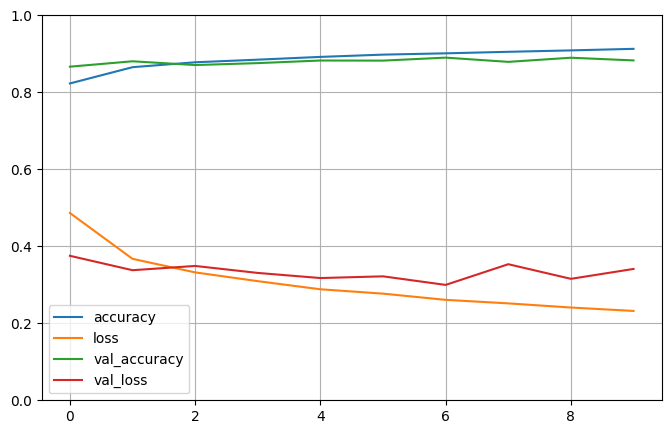

Точність на валідаційних даних для Модель 3: 0.8827


In [9]:
model_3 = create_model_relu_new()
train_and_plot(model_3, "Модель 3", x_train, y_train_one_hot, x_valid, y_valid_one_hot)

In [10]:
from sklearn.metrics import classification_report
import numpy as np

def classification_report_for_model(model, model_name):
    y_pred = model.predict(x_test)
    
    print(f"Звіт по класифікації для {model_name}:")
    print(classification_report(y_test, y_pred.argmax(axis=1), target_names=class_names))

In [11]:
classification_report_for_model(model_1, "Модель 1")
classification_report_for_model(model_2, "Модель 2")
classification_report_for_model(model_3, "Модель 3")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Звіт по класифікації для Модель 1:
              precision    recall  f1-score   support

     T-shirt       0.79      0.84      0.81      1000
     Trouser       0.96      0.98      0.97      1000
    Pullover       0.86      0.67      0.75      1000
       Dress       0.97      0.70      0.81      1000
        Coat       0.66      0.90      0.76      1000
      Sandal       0.98      0.95      0.97      1000
       Shirt       0.70      0.71      0.70      1000
     Sneaker       0.96      0.92      0.94      1000
         Bag       0.94      0.98      0.96      1000
  Ankle boot       0.91      0.98      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Звіт по класифікації для Модель 2:
              precision    recall  f1-score   support

     T-shirt       0.82      0.86 

In [15]:
def classification_report_for_model(model, model_name, x_selected, y_selected):
    y_pred = model.predict(x_selected)
    
    print(f"Звіт по класифікації для {model_name}:")
    print(classification_report(y_selected, y_pred.argmax(axis=1), target_names=class_names))

In [18]:
import random

N_AMOUNT = 20
rand_indices = random.sample(range(x_test.shape[0]), k=N_AMOUNT)

x_selected = x_test[rand_indices]
y_selected = y_test[rand_indices]

x_selected, y_selected

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([1, 3, 6, 3, 3, 6, 9, 4, 5, 9, 6, 5, 2, 7, 8, 4, 6, 0, 6, 5],
       dtype=uint8))

In [19]:
classification_report_for_model(model_1, "Модель 1", x_selected, y_selected)
classification_report_for_model(model_2, "Модель 2", x_selected, y_selected)
classification_report_for_model(model_3, "Модель 3", x_selected, y_selected)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Звіт по класифікації для Модель 1:
              precision    recall  f1-score   support

     T-shirt       1.00      1.00      1.00         1
     Trouser       1.00      1.00      1.00         1
    Pullover       0.50      1.00      0.67         1
       Dress       1.00      1.00      1.00         3
        Coat       0.00      0.00      0.00         2
      Sandal       1.00      1.00      1.00         3
       Shirt       0.80      0.80      0.80         5
     Sneaker       0.50      1.00      0.67         1
         Bag       1.00      1.00      1.00         1
  Ankle boot       1.00      0.50      0.67         2

    accuracy                           0.80        20
   macro avg       0.78      0.83      0.78        20
weighted avg       0.80      0.80      0.78        20

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Звіт по класифікації для Модель 2:
              precision    recall  f1-score   support

     T-shirt       1.00      1.00      1

/home/suphomie/uni/homeworks-labs/deep-learning-tools/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/suphomie/uni/homeworks-labs/deep-learning-tools/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/suphomie/uni/homeworks-labs/deep-learning-tools/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c